[*********************100%***********************]  1 of 1 completed


Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2024-10-22    235.860001
2024-10-23    230.759995
2024-10-24    230.570007
2024-10-25    231.410004
2024-10-28    233.399994
Name: Close, Length: 1717, dtype: float64
Last price: 233.39999389648438


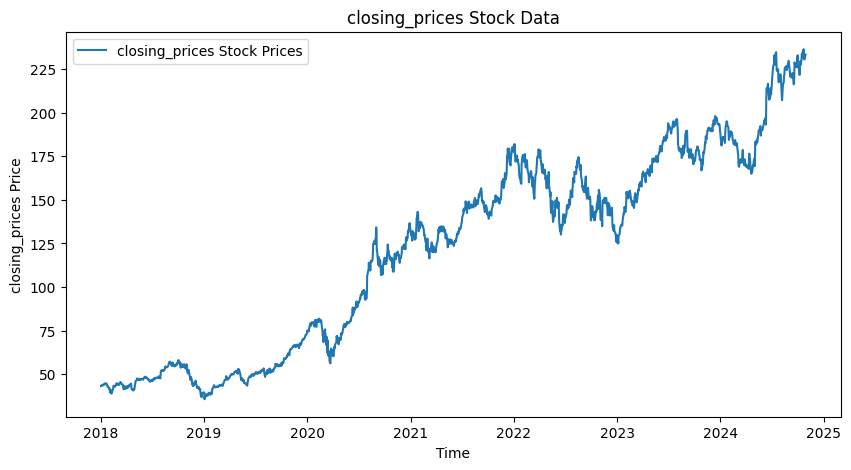

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download stock data
start = '2018-01-01'
end = '2024-10-29'
stock = 'AAPL'  # Example: Apple stock
data = yf.download(stock, start=start, end=end)
closing_prices = data['Close'].dropna()

print(closing_prices)

print(f"Last price: {closing_prices.iloc[-1]}")
plt.figure(figsize=(10, 5))
plt.plot(closing_prices, label='closing_prices Stock Prices')
plt.title('closing_prices Stock Data')
plt.xlabel('Time')
plt.ylabel('closing_prices Price')
plt.legend()
plt.show()


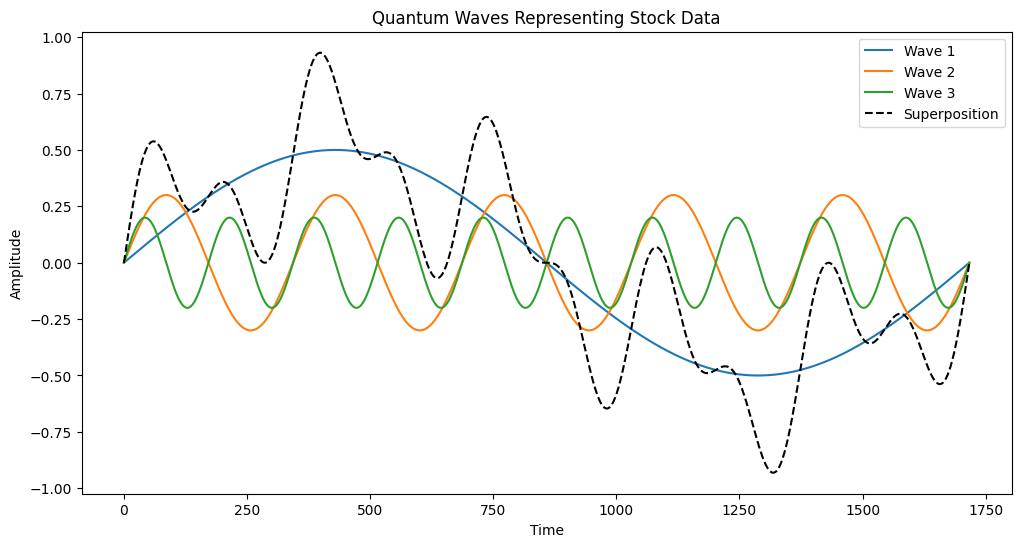

In [4]:
# Define quantum wave components
time = np.linspace(0, len(closing_prices), len(closing_prices))
amplitudes = [0.5, 0.3, 0.2]  # Example amplitudes
frequencies = [1, 5, 10]  # Example frequencies (number of oscillations)
waves = [amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time / len(time)) for i in range(len(frequencies))]

# Combine waves into a single wave (superposition)
quantum_wave = np.sum(waves, axis=0)

# Plot individual waves and their superposition
plt.figure(figsize=(12, 6))
for i, wave in enumerate(waves):
    plt.plot(time, wave, label=f'Wave {i+1}')
plt.plot(time, quantum_wave, label='Superposition', linestyle='--', color='black')
plt.title('Quantum Waves Representing Stock Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


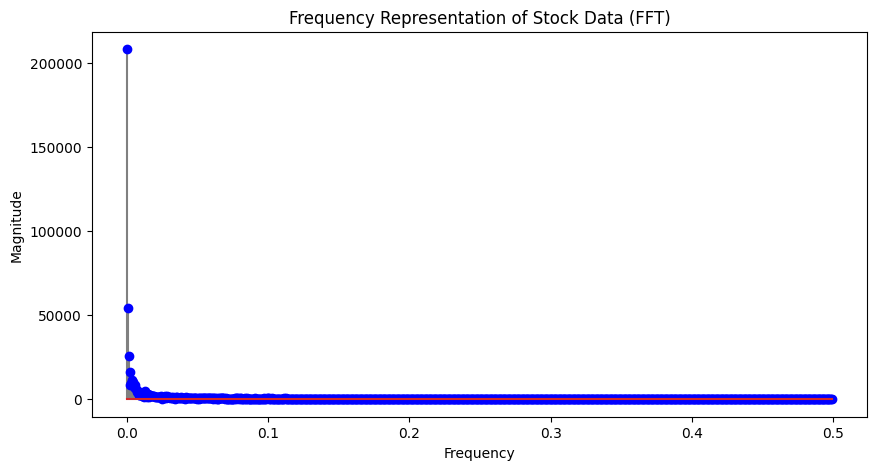

In [5]:
# Apply Fast Fourier Transform (FFT) to the stock data
fft_result = np.fft.fft(closing_prices)
frequencies = np.fft.fftfreq(len(closing_prices))

# Only keep positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
fft_magnitudes = np.abs(fft_result[:len(fft_result)//2])

# Plot the frequency representation
plt.figure(figsize=(10, 5))
markerline, stemlines, baseline = plt.stem(positive_freqs, fft_magnitudes)
plt.setp(stemlines, linestyle="-", color="gray")  # Customize stem lines if desired
plt.setp(markerline, marker="o", color="blue")    # Customize markers
plt.title('Frequency Representation of Stock Data (FFT)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()



# Extract Features

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

# Define constants
seq_length = 50  # Size of sliding window
amplitudes = [0.5, 0.3, 0.2]  # Example amplitudes for quantum waves
frequencies = [1, 5, 10]  # Example frequencies (number of oscillations)

# Adjust the sequence generation loop
X = []
y = []

for i in range(len(closing_prices) - seq_length - 1):  # Ensure valid index range
    sequence = closing_prices[i:i + seq_length]  # Input sequence
    target = closing_prices[i + seq_length]  # Target value (next day)
    
    # Compute Quantum Wave Features
    time = np.linspace(0, seq_length, seq_length)
    quantum_wave = np.sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time / len(time)) for i in range(len(frequencies))], axis=0)
    
    # Apply FFT to the normalized prices to extract frequency components
    fft_result = np.fft.fft(closing_prices[i:i+seq_length])  # Apply FFT to a slice of the data
    frequencies_fft = np.fft.fftfreq(len(fft_result))
    
    # Only keep positive frequencies
    positive_freqs = frequencies_fft[:len(frequencies_fft)//2]
    fft_magnitudes = np.abs(fft_result[:len(fft_result)//2])
    
    # Pad fft_magnitudes with zeros to match the length of quantum_wave (50)
    if len(fft_magnitudes) < 50:
        fft_magnitudes = np.pad(fft_magnitudes, (0, 50 - len(fft_magnitudes)), 'constant')
    elif len(fft_magnitudes) > 50:
        fft_magnitudes = fft_magnitudes[:50]  # Truncate to match length
    
    # Ensure that the length of fft_features and quantum_wave match the expected sequence length
    if len(quantum_wave) == 50 and len(fft_magnitudes) == 50:
        combined_sequence = np.concatenate([sequence, quantum_wave, fft_magnitudes])
        X.append(combined_sequence)
        y.append(target)
    else:
        print(f"Skipping sequence {i} due to mismatched length. Quantum wave: {len(quantum_wave)}, FFT features: {len(fft_magnitudes)}")

# Convert lists to numpy arrays
X_with_features = np.array(X)  # Convert list to np.array
y = np.array(y)

print(X_with_features)
# Check the shape of X and y
print(f"Shape of X_with_features: {X_with_features.shape}")
print(f"Shape of y: {y.shape}")

# Ensure that we have enough data to split into train and test sets
if X_with_features.shape[0] == 0:
    raise ValueError("No valid sequences were created. Check the length and feature concatenation.")


C:\Users\darwi\AppData\Local\Temp\ipykernel_21836\2571131031.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = closing_prices[i + seq_length]  # Target value (next day)


[[ 43.06499863  43.05749893  43.25749969 ...   0.           0.
    0.        ]
 [ 43.05749893  43.25749969  43.75       ...   0.           0.
    0.        ]
 [ 43.25749969  43.75        43.58750153 ...   0.           0.
    0.        ]
 ...
 [221.27000427 221.72000122 224.72000122 ...   0.           0.
    0.        ]
 [221.72000122 224.72000122 226.05000305 ...   0.           0.
    0.        ]
 [224.72000122 226.05000305 225.88999939 ...   0.           0.
    0.        ]]
Shape of X_with_features: (1666, 150)
Shape of y: (1666,)


Epoch 1/50, Loss: 150.7024
Epoch 2/50, Loss: 105.0821
Epoch 3/50, Loss: 55.2711
Epoch 4/50, Loss: 69.2635
Epoch 5/50, Loss: 39.5993
Epoch 6/50, Loss: 60.5259
Epoch 7/50, Loss: 41.9334
Epoch 8/50, Loss: 29.6285
Epoch 9/50, Loss: 71.7949
Epoch 10/50, Loss: 65.2073
Epoch 11/50, Loss: 63.2176
Epoch 12/50, Loss: 55.7316
Epoch 13/50, Loss: 38.6771
Epoch 14/50, Loss: 10.3144
Epoch 15/50, Loss: 21.1379
Epoch 16/50, Loss: 26.2699
Epoch 17/50, Loss: 38.4496
Epoch 18/50, Loss: 27.7050
Epoch 19/50, Loss: 19.6233
Epoch 20/50, Loss: 27.7123
Epoch 21/50, Loss: 27.7896
Epoch 22/50, Loss: 20.4657
Epoch 23/50, Loss: 33.5679
Epoch 24/50, Loss: 19.5504
Epoch 25/50, Loss: 10.6690
Epoch 26/50, Loss: 18.2528
Epoch 27/50, Loss: 34.1062
Epoch 28/50, Loss: 16.8310
Epoch 29/50, Loss: 21.1390
Epoch 30/50, Loss: 17.2945
Epoch 31/50, Loss: 28.3492
Epoch 32/50, Loss: 27.5011
Epoch 33/50, Loss: 22.6783
Epoch 34/50, Loss: 18.3890
Epoch 35/50, Loss: 20.8154
Epoch 36/50, Loss: 9.8808
Epoch 37/50, Loss: 29.2043
Epoch 38/

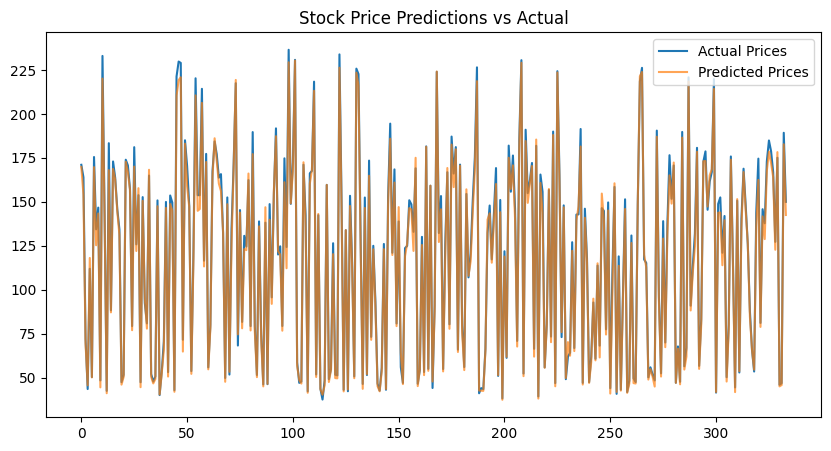

Predicted Next Day's Price: 228.3249


In [8]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X_with_features, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split into train and test datasets
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size
train_dataset, test_dataset = random_split(
    TensorDataset(X_tensor, y_tensor), [train_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

########## ------------------

# Define a simple neural network
class BasicNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BasicNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.network(x)

# Hyperparameters
input_dim = X_with_features.shape[1]  # Each sequence has 'seq_length' features plus quantum and FFT components
hidden_dim = 64
output_dim = 1
num_epochs = 50
learning_rate = 0.001

# Model, loss function, and optimizer
model = BasicNN(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(num_epochs):
    for batch_features, batch_targets in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_features)
        loss = criterion(predictions, batch_targets)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Testing
# Evaluate model performance
model.eval()
with torch.no_grad():
    predictions = []
    actual = []
    for X_batch, y_batch in test_loader:
        preds = model(X_batch)
        predictions.extend(preds.squeeze().numpy())
        actual.extend(y_batch.squeeze().numpy())

# Compute MSE
mse = np.mean((np.array(predictions) - np.array(actual))**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Plot predictions vs actual prices
plt.figure(figsize=(10, 5))
plt.plot(range(len(actual)), actual, label="Actual Prices")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", alpha=0.7)
plt.legend()
plt.title("Stock Price Predictions vs Actual")
plt.show()

# Predict the next day's price
# Assuming you already have mean and std from your original data (closing_prices)
mean = closing_prices.mean()
std = closing_prices.std()

# Inside the prediction block
with torch.no_grad():
    recent_window = closing_prices[-seq_length:]  # Most recent sliding window
    # Combine recent window with quantum wave and FFT features
    combined_window = np.concatenate([recent_window, quantum_wave[:seq_length], fft_magnitudes[-seq_length:]])
    recent_window_tensor = torch.tensor(combined_window, dtype=torch.float32).unsqueeze(0)  # Add batch dim
    predicted = model(recent_window_tensor).item()  # Model predicts in the normalized range

    # Print the predicted price
    print(f"Predicted Next Day's Price: {predicted:.4f}")

